## Introduction
### What is machine Learning?
-  building programs with __tunable parameters__ that are adjusted automatically so as to improve their behavior by __adapting to previously seen data__.

1) __Classification__ task:
   - A collection of two-dimensional data, colored according to two different class labels.
   - By drawing this separating line, we have learned a model which can __generalize__ to new data.
     - if you were to drop another point onto the plane which is unlabeled, this algorithm could now __predict__ whether it’s a blue or a red point.

2) __Regression__ task:
   - A simple best-fit line to a set of data.
   - The model has been __learned__ from the training data, and can be used to predict the result of test data
     - we might be given an x-value, and the model would allow us to predict the y value.

### Data in scikit-learn
#### The data matrix

- A __two-dimensional array or matrix__. The arrays can be either _numpy_ arrays, or in some cases _scipy.sparse_ matrices. The size of the array is expected to be [n_samples, n_features]
  - __n_samples__: 
    - Each sample is an item to process (e.g. classify). A sample can be a document, a picture, a sound, a video, an astronomical object, a row in database or CSV file.
  - __n_features__:
    - The number of features or distinct traits that can be used to describe each item in a quantitative manner.
    
The number of features must be fixed in advance.
It can be very high dimensional (e.g. millions of features) with most of them being zeros for a given sample.
   - This is a case where _scipy.sparse_ matrices can be useful, in that they are much more memory-efficient than _numpy_ arrays.

### Simple Example: The iris dataset

#### The application problem
Suppose we want to recognize species of irises. The data consists of measurements of three different species of irises:

| ![Setosa Iris](https://scipy-lectures.org/_images/iris_setosa.jpg) | ![Versicolor Iris](https://scipy-lectures.org/_images/iris_versicolor.jpg) | ![Virginica Iris](https://scipy-lectures.org/_images/iris_virginica.jpg) |
|:-------------------------:|:-------------------------:|:-------------------------:|
|Setosa Iris                |Versicolor Iris            | Virginica Iris            |

__Quick Question:__

__If we want to design an algorithm to recognize iris species, what might the data be?__

Remember: we need a 2D array of size [n_samples x n_features].
- What would the n_samples refer to?
- What might the n_features refer to?

Remember that there must be a __fixed__ number of features for each sample, and feature number i must be a similar kind of quantity for each sample.

#### Loading the Iris Data with scikit-learn

Scikit-learn has a very straightforward set of data on these iris species. The data consist of the following:
- Features in the Iris dataset:
    - sepal length (cm)
    - sepal width (cm)
    - petal length (cm)
    - petal width (cm)
- Target classes to predict:
    - Setosa
    - Versicolour
    - Virginica

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

The feature of each sample flower are stored in the data attribute of the dataset

In [2]:
print(iris.data.shape)

(150, 4)


In [3]:
n_samples, n_features = iris.data.shape
print(n_samples, n_features)

150 4


In [4]:
print(iris.data[0])

[5.1 3.5 1.4 0.2]


The information about the class of each sample flower is stored in the target attribute of the dataset

In [5]:
print(iris.target.shape)

(150,)


In [6]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


The names of the class are stored in the last attribute, namely target_names

In [7]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


This data is four-dimensional, but we can visualize two of the dimensions at a time using a scatter plot:

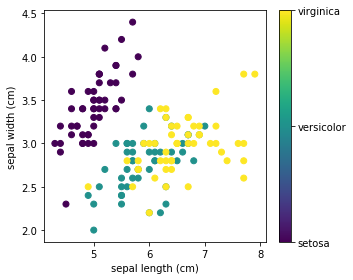

In [9]:
import matplotlib.pyplot as plt
# The indices of the features that we are plotting
x_index = 0
y_index = 1

#label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.tight_layout()
plt.show()

#### Excercise:

Can you choose 2 features to find a plot where it is easier to seperate the different classes of irises?

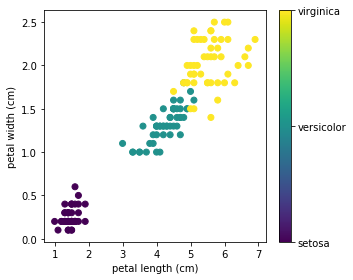

In [10]:
import matplotlib.pyplot as plt
# The indices of the features that we are plotting
x_index = 2
y_index = 3

#label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.tight_layout()
plt.show()

## Basic Principles of ML with scikit-learn
### scikit-learn estimator object

Linear Regression is : sklearn.linear_model.LinearRegression

In [11]:
from sklearn.linear_model import LinearRegression

__Estimator parameters__: All the params of an estimator can be set when it is instantiated

In [12]:
model = LinearRegression(normalize=True)
print(model.normalize)

True


In [13]:
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


#### Fitting on data

Let's create some simple data with numpy

In [15]:
import numpy as np
x = np.array([0, 1, 2])
y = np.array([0, 1, 2])
X = x[:,np.newaxis]      # The input data for sklearn is 2D: (samples == 3 x fearures == 1)

X

array([[0],
       [1],
       [2]])

In [16]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [17]:
model.coef_

array([1.])

### Supervised Learning: Classification and Regression

* In __Supervised Learning__, we have a dataset consisting of both features and labels.
* The task is to construct an estimator which can predict the label of an object given the set of features

* Supervised Learning is of two categories: __classification__ and __regression__.
    - In classification, label is discrete, while in regression, the label is continuous.

For example, in astronomy, the task of determining whether an object is a star, a galaxy, or a quasar is a classification problem: the label is from three distinct categories. On the other hand, we might wish to estimate the age of an object based on such observations: this would be a regression problem, because the label (age) is a continuous quantity.

__Classification__: K nearest neighbors (kNN) is one of the simplestlearning strategies.
   - Given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class

- The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.
- KNN captures the idea of similarity (sometimes called distance, proximity, or closeness) by calculating the distance between points on a graph.

Note: There are other ways of calculating distance, and one way might be preferable depending on the problem we are solving. However, the straight-line distance (aka Euclidean distance) is a popular and familiar choice.

__KNN Algorithm.__ (src = 'https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761')
1. Load the data
2. Initialize K to your chosen number of neighbors
3. For each example in the data<br>
    3.1 Calculate the distance between the query example and the current example from the data.<br>
    3.2 Add the distance and the index of the example to an ordered collection
4. Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
5. Pick the first K entries from the sorted collection
6. Get the labels of the selected K entries
7. If regression, return the mean of the K labels
8. If classification, return the mode of the K labels

#### Choosing th right K value

- Run KNN algorithm several times with different values of K
    - choose the K that reduces the number of errors while making accurate predictions

__Things to remember__:
- if we decrease the vlaue of K to 1, our predictions will get less stable
- if we increase the value of K, our predictions become more stable due to majority voting/ averaging, and thus, more likely to make more accurate predictions (up to a certain point).
    - Eventually, we begin to witness an increasing number of errors. It is at this point we know we have pushed the value of K too far.
- In cases where we are taking a majority vote among labels, we usually make K an odd number to have a tiebreaker.

In [18]:
from sklearn import neighbors, datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target

knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

# What kind of iris has 3cm X 5cm sepal and 4cm x 2cm petal?
print(iris.target_names[knn.predict([[3, 5, 4, 2]])])

['virginica']


### Example: Nearest-neighbor prediction on iris

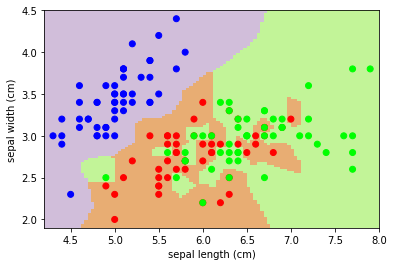

In [21]:
import numpy as np
from sklearn import datasets, neighbors
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

# Create color maps for 3-class classification problem, as with iris

cmap_light = ListedColormap(['#D1BEDA', '#E8AD73', '#C2F498']) # [Lavedar, Orange, green]
cmap_bold = ListedColormap(['#0000FF', '#FF0000', '#00FF00'])     # RGB

# Load the IRIS dataset
iris = datasets.load_iris()
X = iris.data[:, :2]        # We can only take the first 2 features. Note: This ugly slicing can be avoided by using a 2-D dataset
y = iris.target

knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

# Setting the coordinate values
x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Plotting the data into the color map
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plotting the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')
plt.savefig('_images/kNN_1_pred_iris')
plt.show()

#### kNN Classification with 3 neighbors

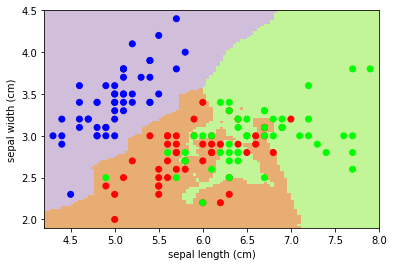

In [26]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Plotting the data into the color map
Z = Z.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plotting the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')
plt.savefig('_images/kNN_3_pred_iris')
plt.show()